In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# read data into a DataFrame from bottom
df=pd.read_csv('datafile_1.csv')
df

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83
8,COTTON,Gujarat,29616.09,42070.44,2179.26,19.05
9,COTTON,Haryana,29918.97,44018.18,2127.35,19.90


In [4]:
df.columns = df.columns.str.strip ()

In [5]:
df.rename(columns={'Yield (Quintal/ Hectare)': 'Yield'}, inplace=True)

In [32]:
df.rename(columns={'Cost of Cultivation (`/Hectare) A2+FL': 'CC1'}, inplace=True)

In [33]:
df.rename(columns={'Cost of Cultivation (`/Hectare) C2': 'CC2'}, inplace=True)

In [34]:
df.rename(columns={'Cost of Production (`/Quintal) C2': 'Production'}, inplace=True)

In [7]:
df.shape

(49, 6)

<Axes: xlabel='Cost of Production (`/Quintal) C2'>

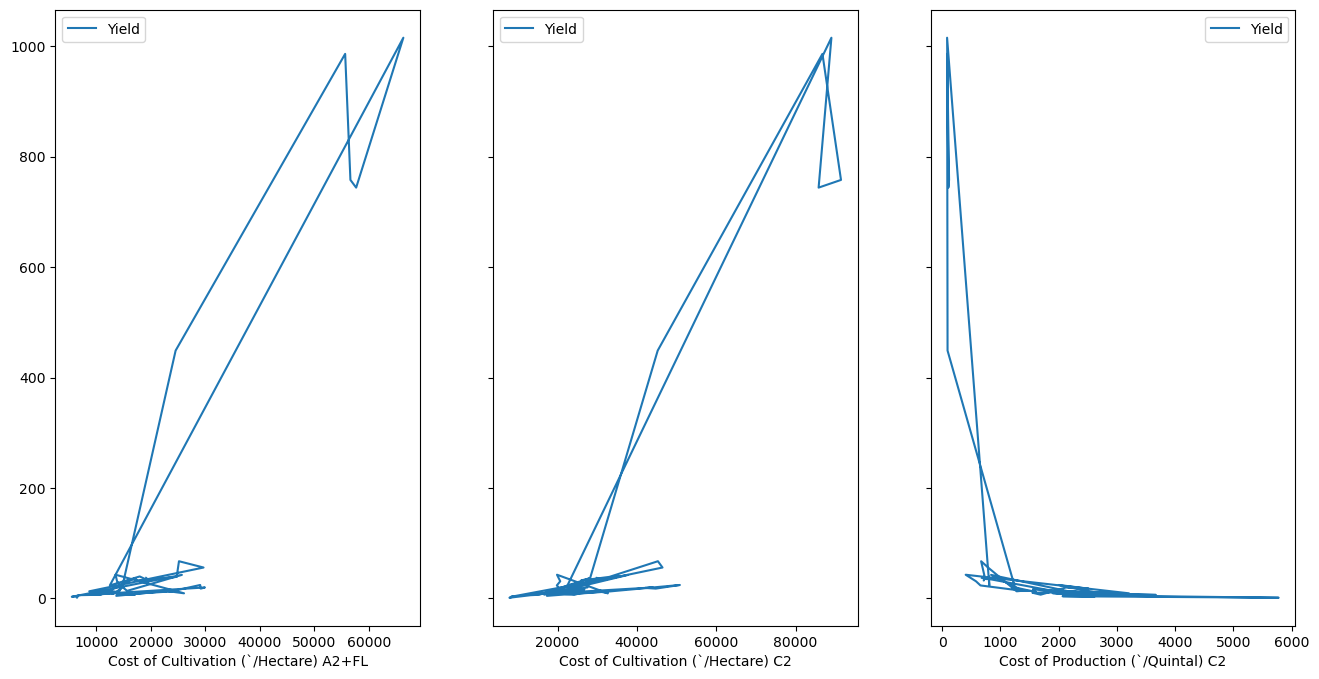

In [11]:
# visualize the relationship between the features and the response using scatterplots
fig, axs=plt.subplots(1,3,sharey=True)


df.plot(kind='line', x="Cost of Cultivation (`/Hectare) A2+FL",y ="Yield", ax=axs[0], figsize=(16,8))
df.plot(kind='line', x="Cost of Cultivation (`/Hectare) C2",y ="Yield", ax=axs[1])
df.plot(kind='line', x="Cost of Production (`/Quintal) C2",y ="Yield", ax=axs[2])

In [12]:
# create X and y
feature_cols=['Cost of Cultivation (`/Hectare) A2+FL']
X=df[feature_cols]
y=df.Yield

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(X,y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-219.92647772244175
[0.0156168]


In [16]:
# manually calculate the prediction
-219.92647772244175+0.0156168*50

-219.14563772244173

In [17]:
# We have to create a DataFrame since the Statsmodels formula interface expects it
X_new=pd.DataFrame({'Cost of Cultivation (`/Hectare) A2+FL':[50]})
X_new.head()

,Cost of Cultivation (`/Hectare) A2+FL
0,50


In [18]:
# using the model to make predictions on a new value
lm.predict(X_new)

array([-219.14563791])

In [66]:
# create a DataFrame with the minimum and maximum values of Cost of Cultivation (`/Hectare) A2+FL
# We have to create a DataFrame since the Statsmodels formula interface expects it
X_new=pd.DataFrame({'Cost of Cultivation (`/Hectare) A2+FL':[df.CC1.min(), df.CC1.max()]})
X_new.head()

,Cost of Cultivation (`/Hectare) A2+FL
0,5483.54
1,66335.06


In [36]:
# make predictions for those x values and store them
# use the model to make predictions on a new value
preds=lm.predict(X_new)
preds

array([-134.29115115,  816.01463442])

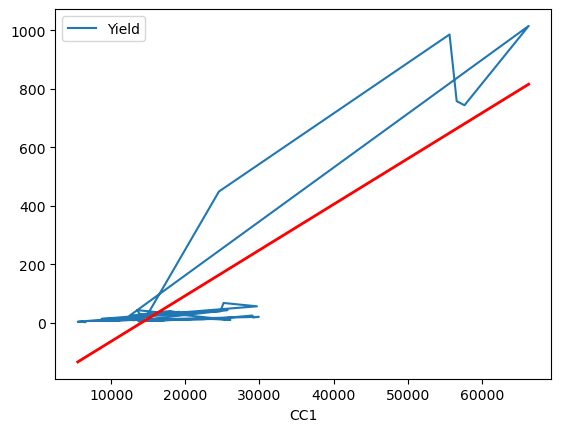

In [38]:
# first, plot the observed data
df.plot(kind='line',x='CC1',y='Yield')

# then, plot the least squares line
plt.plot(X_new, preds, c='red',linewidth=2)

In [43]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Yield~CC1',data=df).fit()
lm.conf_int()

,0,1
Intercept,-285.236238,-154.616717
CC1,0.012939,0.018295


In [44]:
# printing the R-squared value for the model
lm.rsquared

0.7454601836543073

In [45]:
# creating X and y
feature_cols=['CC1','CC2','Production']
X=df[feature_cols]
y=df.Yield

from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(X,y)

# printing intercept and coefficients
print(lm.intercept_)
print(lm.coef_)



-168.38331011650104
[ 0.00933742  0.00371491 -0.02480026]


In [46]:
lm=smf.ols(formula='Yield~CC1+CC2+Production',data=df).fit()
lm.conf_int()

,0,1
Intercept,-287.945043,-48.821578
CC1,-0.005099,0.023774
CC2,-0.006398,0.013828
Production,-0.064182,0.014581


In [48]:
lm=smf.ols(formula='Yield~CC1+CC2',data=df).fit()
lm.rsquared

0.7554051802600381

In [50]:
# add Production to the model (which we believe has no association with Sales)
lm=smf.ols(formula='Yield~CC1+CC2+Production',data=df).fit()
lm.rsquared

0.763847741329705

In [56]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)
# creating a Series of booleans in which roughly half are True
nums=np.random.rand(len(df))
mask_large=nums  >0.5
# initially set Size to small, then change roughly half to be large
df["Products_Size"]='small'
df.loc[mask_large,'Size']='large'
df.head()

,Crop,State,CC1,CC2,Production,Yield,Size,IsLarge,Products_Size
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83,large,1,small
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47,small,0,small
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59,small,0,small
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42,small,0,small
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72,large,1,small


In [57]:
# create a new Series called IsLarge
df['IsLarge']=df.Size.map({'small':0,'large':1})
df.head()

,Crop,State,CC1,CC2,Production,Yield,Size,IsLarge,Products_Size
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83,large,1,small
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47,small,0,small
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59,small,0,small
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42,small,0,small
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72,large,1,small


In [58]:
# create X and y
feature_cols=['CC1','CC2','Production','IsLarge']
X=df[feature_cols]
y=df.Yield

# instantiate, fit
lm= LinearRegression()
lm.fit(X,y)

# print coefficients
print(feature_cols,lm.coef_)

['CC1', 'CC2', 'Production', 'IsLarge'] [ 9.40662149e-03  3.65138444e-03 -2.61641511e-02  1.16760800e+01]


In [61]:
# set a seed for reproducibility
np.random.seed(12345)
# create a Series of booleans in which roughly half are True
nums=np.random.rand(len(df))
mask_range=(nums  >00.335) & (nums <0.66)
mask_large=nums> 0.66

df["Products_Size"]='low yield'
df.loc[mask_range,'Products_Size']='Normal yield'
df.loc[mask_large,'Products_Size']='Good yield'
df.head()

,Crop,State,CC1,CC2,Production,Yield,Size,IsLarge,Products_Size
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83,large,1,Good yield
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47,small,0,low yield
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59,small,0,low yield
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42,small,0,low yield
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72,large,1,Normal yield


In [64]:
# create three dummy variables using get_dummies, then exclude the first dummy column
Products_Size_dummies=pd.get_dummies(df.Products_Size,prefix='Products_Size').iloc[:,1:]
Products_Size_dummies

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data=pd.concat([df,Products_Size_dummies],axis=1)
data.head()

,Crop,State,CC1,CC2,Production,Yield,Size,IsLarge,Products_Size,Products_Size_Normal yield,Products_Size_low yield
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83,large,1,Good yield,0,0
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47,small,0,low yield,0,1
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59,small,0,low yield,0,1
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42,small,0,low yield,0,1
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72,large,1,Normal yield,1,0


In [65]:

# create X and y
feature_cols=['CC1','CC2','Production','IsLarge','Products_Size_Normal yield','Products_Size_low yield']
X=data[feature_cols]
y=data.Yield

# instantiate, fit
lm= LinearRegression()
lm.fit(X,y)

# print intercept and coefficients
print(feature_cols,lm.coef_)


['CC1', 'CC2', 'Production', 'IsLarge', 'Products_Size_Normal yield', 'Products_Size_low yield'] [ 8.58527452e-03  4.05096777e-03 -3.33969095e-02  1.10531557e+02
 -3.54192955e+00  1.29380924e+02]
